## 1) Prepare a classification model using SVM for salary data 

**Data Description:**

* age -- age of a person
* workclass	-- A work class is a grouping of work 
* education	-- Education of an individuals	
* maritalstatus -- Marital status of an individulas	
* occupation	 -- occupation of an individuals
* relationship -- 	
* race --  Race of an Individual
* sex --  Gender of an Individual
* capitalgain --  profit received from the sale of an investment	
* capitalloss	-- A decrease in the value of a capital asset
* hoursperweek -- number of hours work per week	
* native -- Native of an individual
* Salary -- salary of an individual

# 1.Import Necessary Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 2.Import Data

In [2]:
train=pd.read_csv('SalaryData_Train(1).csv')
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
test=pd.read_csv('SalaryData_Test(1).csv')
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


# 3.Data Understanding

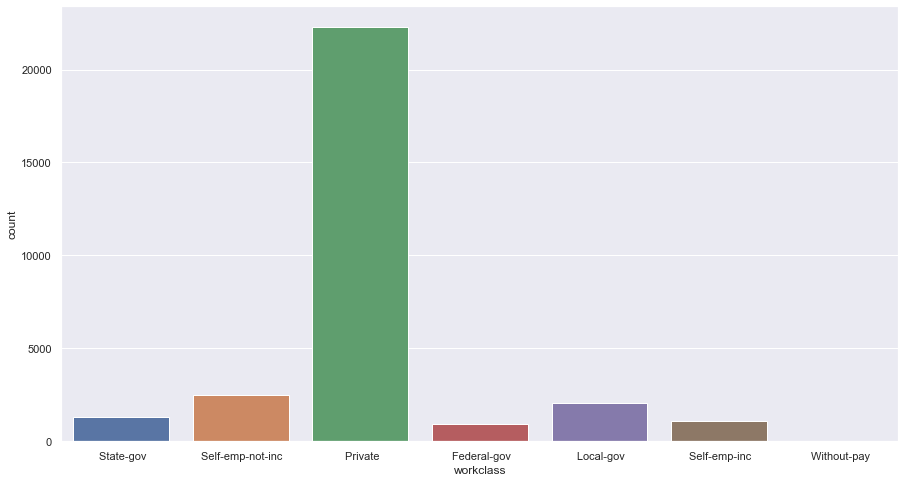

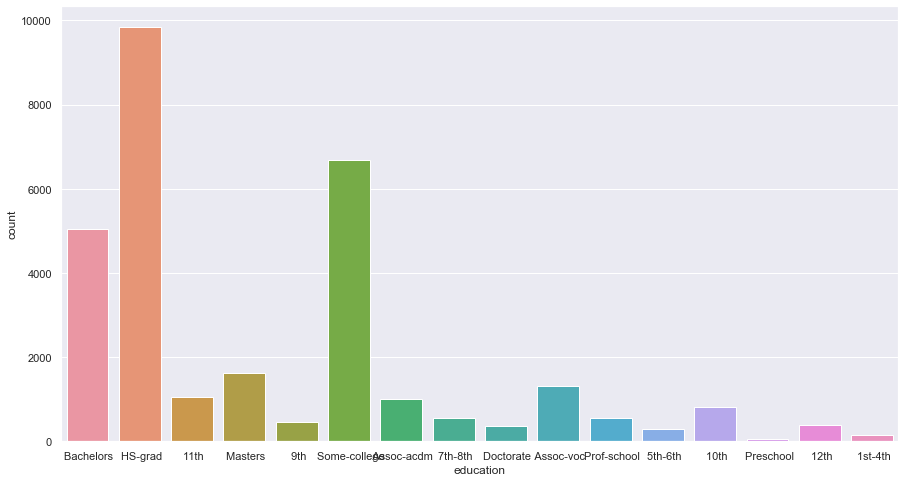

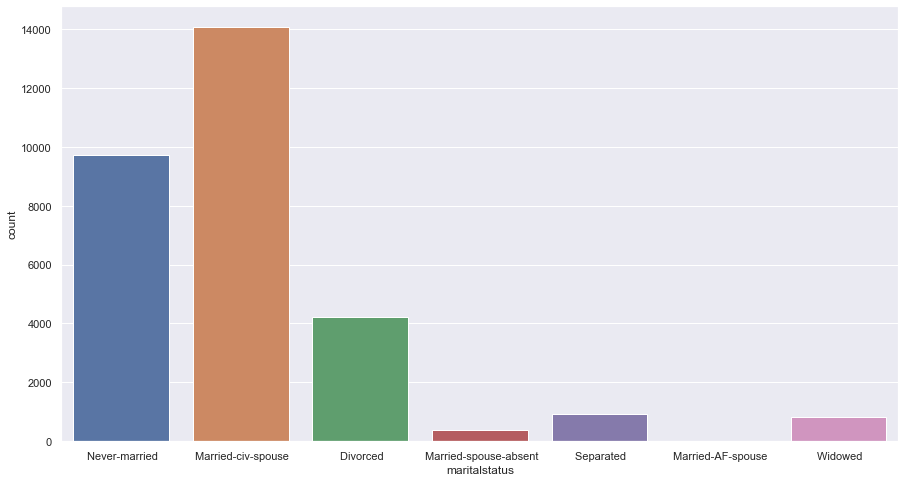

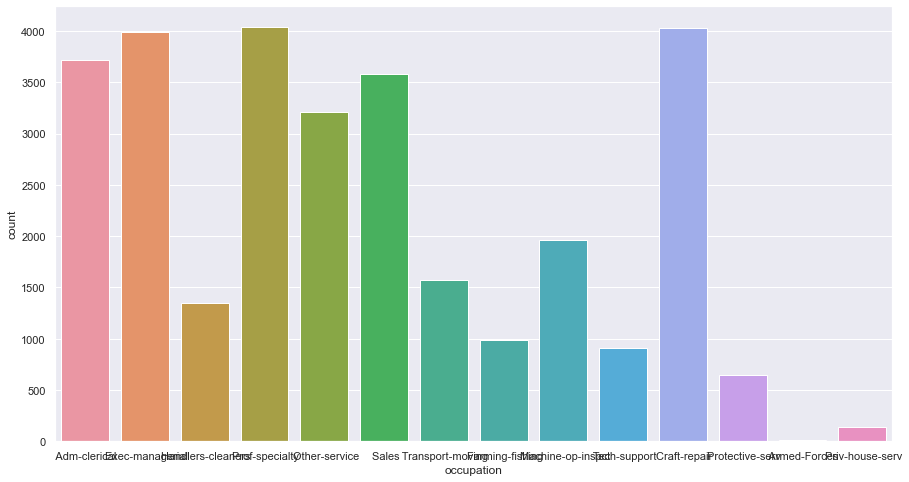

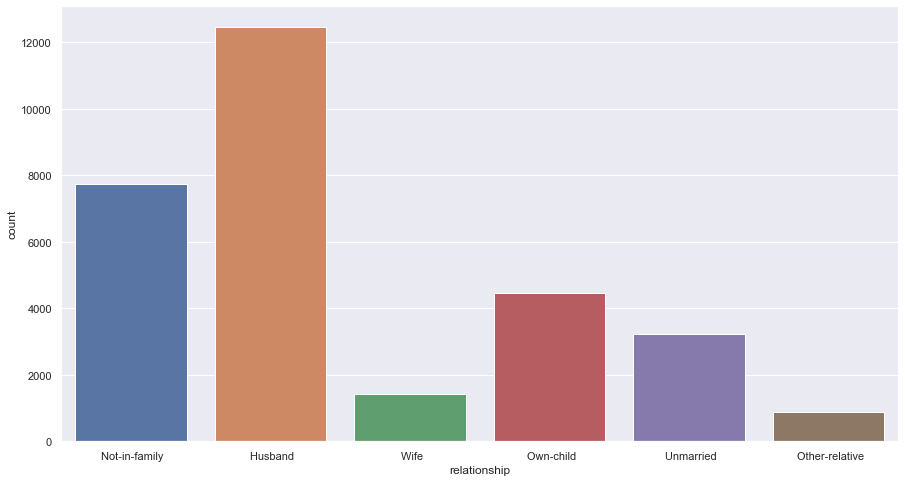

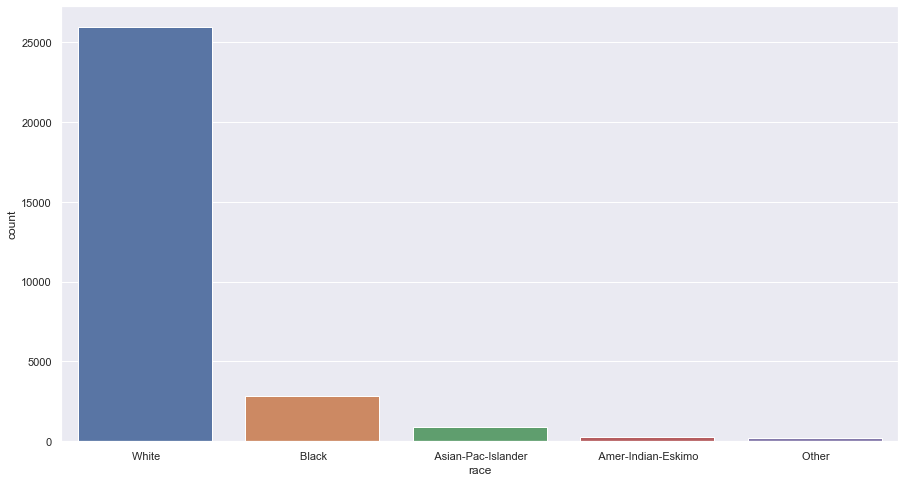

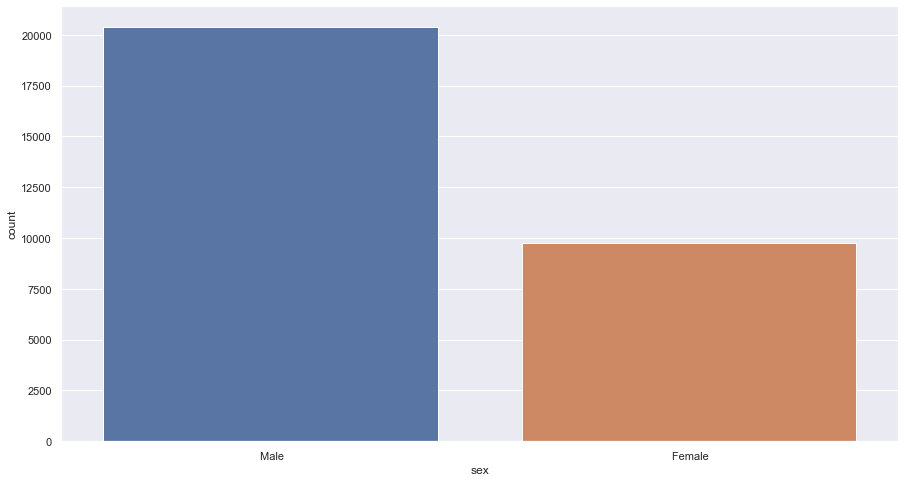

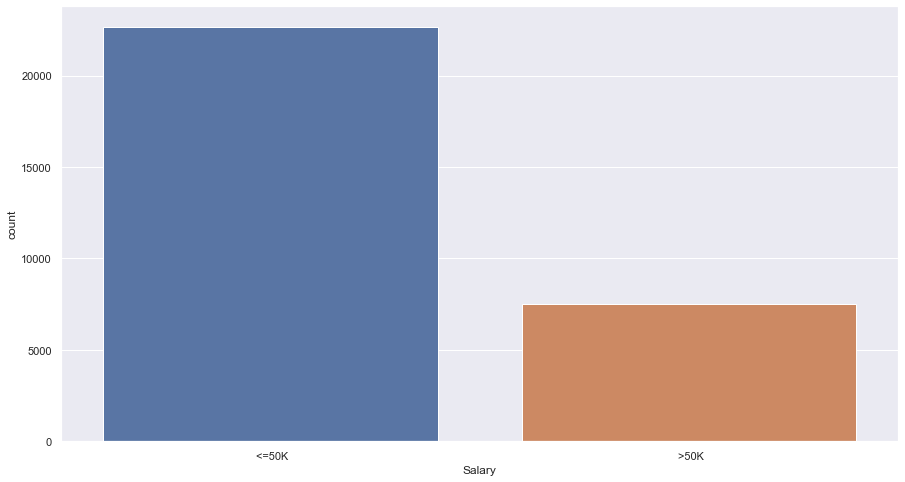

In [4]:
#Countplot for all Catogorical Columns
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15,8)})
cat_col = ['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex','Salary']
for col in cat_col:
    plt.figure() #this creates a new figure on which your plot will appear
    sns.countplot(x = col, data = train)

# Inference:
The highest frequency/count Observed is
   * In Work-Class - Private
   * In Education - HS-grad,Some Colleges
   * In Marital Status - Married-Civ-Spouse,Never-Married
   * In Relationship - Husband, Not-in-family
   * In Race - White
   * In Sex - Male
   * **In Salary - <=50k**
   

>**For Train Data:**

In [5]:
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [6]:
train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

### Converting (Train) catogorical Data into numeric Data using Label Encoder

In [7]:
le=LabelEncoder()
train['workclass']=le.fit_transform(train['workclass'])
train['education']=le.fit_transform(train['education'])
train['maritalstatus']=le.fit_transform(train['maritalstatus'])
train['occupation']=le.fit_transform(train['occupation'])
train['relationship']=le.fit_transform(train['relationship'])
train['race']=le.fit_transform(train['race'])
train['sex']=le.fit_transform(train['sex'])
train['native']=le.fit_transform(train['native'])
train['Salary']=le.fit_transform(train['Salary'])

In [8]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [9]:
train.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

In [10]:
#Converted object datatypes into int dtypes

>**For Test Data:**

In [11]:
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [12]:
test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

### Converting (Test) catogorical Data into numeric Data using Label Encoder

In [13]:
le=LabelEncoder()
test['workclass']=le.fit_transform(test['workclass'])
test['education']=le.fit_transform(test['education'])
test['maritalstatus']=le.fit_transform(test['maritalstatus'])
test['occupation']=le.fit_transform(test['occupation'])
test['relationship']=le.fit_transform(test['relationship'])
test['race']=le.fit_transform(test['race'])
test['sex']=le.fit_transform(test['sex'])
test['native']=le.fit_transform(test['native'])
test['Salary']=le.fit_transform(test['Salary'])

In [14]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [15]:
test.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

In [16]:
#Converted all object dtypes into int dtypes

In [17]:
x=train.iloc[:,0:-1]
y=train['Salary']

## Train Test Split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
x_train.shape,y_train.shape

((24128, 13), (24128,))

In [20]:
x_test.shape,y_test.shape

((6033, 13), (6033,))

## Building SVM Model

#### Terminology:
   * SVM -Support Vector Machine
   * SVC- Support Vector Classifier

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score

In [22]:
svc=SVC()
svc.fit(x_train,y_train)

#Making Predictions
y_pred_test=svc.predict(x_test)

#Summarize the fit of the model
print('Classification Report:',classification_report(y_test,y_pred_test))
print('confusion matrix:', confusion_matrix(y_test,y_pred_test))
print('Accuarcy score:',accuracy_score(y_test,y_pred_test))
print('Precision Score:',precision_score(y_test,y_pred_test))
print('Recall Score:', recall_score(y_test,y_pred_test))

Classification Report:               precision    recall  f1-score   support

           0       0.80      0.97      0.88      4559
           1       0.72      0.26      0.38      1474

    accuracy                           0.79      6033
   macro avg       0.76      0.61      0.63      6033
weighted avg       0.78      0.79      0.75      6033

confusion matrix: [[4411  148]
 [1097  377]]
Accuarcy score: 0.7936350074589756
Precision Score: 0.7180952380952381
Recall Score: 0.25576662143826323


### Note:
* **Precision:** The higher the precision, the more confident the model is when it classifies a sample as Positive
* **Recall:** The higher the recall, the more positive samples the model correctly classified as Positive

## Testing it on new data 

In [23]:
x_new= test.iloc[:,0:-1]
y_new= test['Salary']

In [24]:
#Making Predictions
y_pred_new=svc.predict(x_new)

In [25]:
#Summarize the fit of the Model
print('Classification Report:',classification_report(y_new,y_pred_new))
print('confusion matrix:', confusion_matrix(y_new,y_pred_new))
print('Accuarcy score:',accuracy_score(y_new,y_pred_new))
print('Precision Score:',precision_score(y_new,y_pred_new))
print('Recall Score:', recall_score(y_new,y_pred_new))

Classification Report:               precision    recall  f1-score   support

           0       0.80      0.97      0.88     11360
           1       0.73      0.27      0.39      3700

    accuracy                           0.80     15060
   macro avg       0.77      0.62      0.64     15060
weighted avg       0.79      0.80      0.76     15060

confusion matrix: [[10995   365]
 [ 2703   997]]
Accuarcy score: 0.796281540504648
Precision Score: 0.7320117474302497
Recall Score: 0.2694594594594595


## Building SVM model with Hyper Parameters kernel='rbf',gamma=15, C=1

In [ ]:
model = SVC(kernel='rbf',gamma=15, C=1)
model.fit(x_train,y_train)

#Making Predictions
y_pred_test=model.predict(x_test)

#Summarize the fit of the model
print('Classification Report:',classification_report(y_test,y_pred_test))
print('confusion matrix:', confusion_matrix(y_test,y_pred_test))
print('Accuarcy score:',accuracy_score(y_test,y_pred_test))
print('Precision Score:',precision_score(y_test,y_pred_test))
print('Recall Score:', recall_score(y_test,y_pred_test))

## Testing it on New Data

In [ ]:
#Making Predictions
y_pred_new=model.predict(x_new)

#Summarize the fit of the Model
print('Classification Report:',classification_report(y_new,y_pred_new))
print('confusion matrix:', confusion_matrix(y_new,y_pred_new))
print('Accuarcy score:',accuracy_score(y_new,y_pred_new))
print('Precision Score:',precision_score(y_new,y_pred_new))
print('Recall Score:', recall_score(y_new,y_pred_new))

## Building SVM model with Hyper Parameters kernel='linear',gamma=0.22, C=0.1

In [ ]:
model_2 = SVC(kernel='linear',gamma=15, C=1)
model_2.fit(x_train,y_train)

#Making Predictions
y_pred_test=model_2.predict(x_test)

#Summarize the fit of the model
print('Classification Report:',classification_report(y_test,y_pred_test))
print('confusion matrix:', confusion_matrix(y_test,y_pred_test))
print('Accuarcy score:',accuracy_score(y_test,y_pred_test))
print('Precision Score:',precision_score(y_test,y_pred_test))
print('Recall Score:', recall_score(y_test,y_pred_test))

## Testing it on New Data

In [ ]:
#Making Predictions
y_pred_new=model_2.predict(x_new)

#Summarize the fit of the Model
print('Classification Report:',classification_report(y_new,y_pred_new))
print('confusion matrix:', confusion_matrix(y_new,y_pred_new))
print('Accuarcy score:',accuracy_score(y_new,y_pred_new))
print('Precision Score:',precision_score(y_new,y_pred_new))
print('Recall Score:', recall_score(y_new,y_pred_new))

## Conclusion:
   >From the above observations,The svc Model is giving the 
     * Highest Accuracy, High Precision rate when compared to other Models
     
   >As the linear model is still running/executing it is not suitable